In [ ]:
from datetime import timedelta
import os
import sys
import os.path
from pathlib import Path
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt


from source.utils.files import get_newest_file
from source.config import Categories

# EDA of the files as they come

In [2]:
csv_path=Path.cwd()/"../../data/csv"

last_pre_classification=get_newest_file(csv_path/"pre_manual_classification/")
print(f"Last preclassification: {last_pre_classification.name}")
df=pd.read_csv(last_pre_classification)

df['eco_datetime'] = pd.to_datetime(df['eco_datetime'],format='ISO8601')
df['eco_date'] = pd.to_datetime(df['eco_datetime'].dt.date)
#number_img_last_time=6827
all_img_before=df.shape[0]#+number_img_last_time

print(f"We have {all_img_before} ultrasound files images.")
df.head()

Last preclassification: convert_2025_07_01_11_11_49.csv
We have 12156 ultrasound files images.


,directory,job_datetime,subdirectory,eco_datetime,filename,image_datetime,image_id,eco_date
0,DeId-20250402.151235.782,2025-04-02 15:12:35.782,20250310191141406,2025-03-10 19:11:41.406,4_202504021524061820004.jpg,2025-04-02 15:24:06.182,4,2025-03-10
1,DeId-20250402.151235.782,2025-04-02 15:12:35.782,20250310191141406,2025-03-10 19:11:41.406,1_202504021524061820001.jpg,2025-04-02 15:24:06.182,1,2025-03-10
2,DeId-20250402.151235.782,2025-04-02 15:12:35.782,20250310191141406,2025-03-10 19:11:41.406,3_202504021524061820003.jpg,2025-04-02 15:24:06.182,3,2025-03-10
3,DeId-20250402.151235.782,2025-04-02 15:12:35.782,20250310191141406,2025-03-10 19:11:41.406,2_202504021524061820002.jpg,2025-04-02 15:24:06.182,2,2025-03-10
4,DeId-20250402.151212.31,2025-04-02 15:12:12.310,20250324093157317,2025-03-24 09:31:57.317,3_202504021520211510003.jpg,2025-04-02 15:20:21.151,3,2025-03-24


## Number of ecos

In [3]:
first_datetime=df.eco_datetime.min()
last_datetime=df.eco_datetime.max()
print(f"The range in time goes from {first_datetime} being the first one, to {last_datetime} being the last one.")
print(f"which means {last_datetime-first_datetime} passed from the first ultrasound to the last one.")
print(f"We have {df.eco_date.nunique()} dates.")
print("So, there was a lot of days in wich the machine wasnt use.")


The range in time goes from 2024-08-14 09:08:09.790000 being the first one, to 2025-06-19 13:18:48 being the last one.
which means 309 days 04:10:38.210000 passed from the first ultrasound to the last one.
We have 132 dates.
So, there was a lot of days in wich the machine wasnt use.


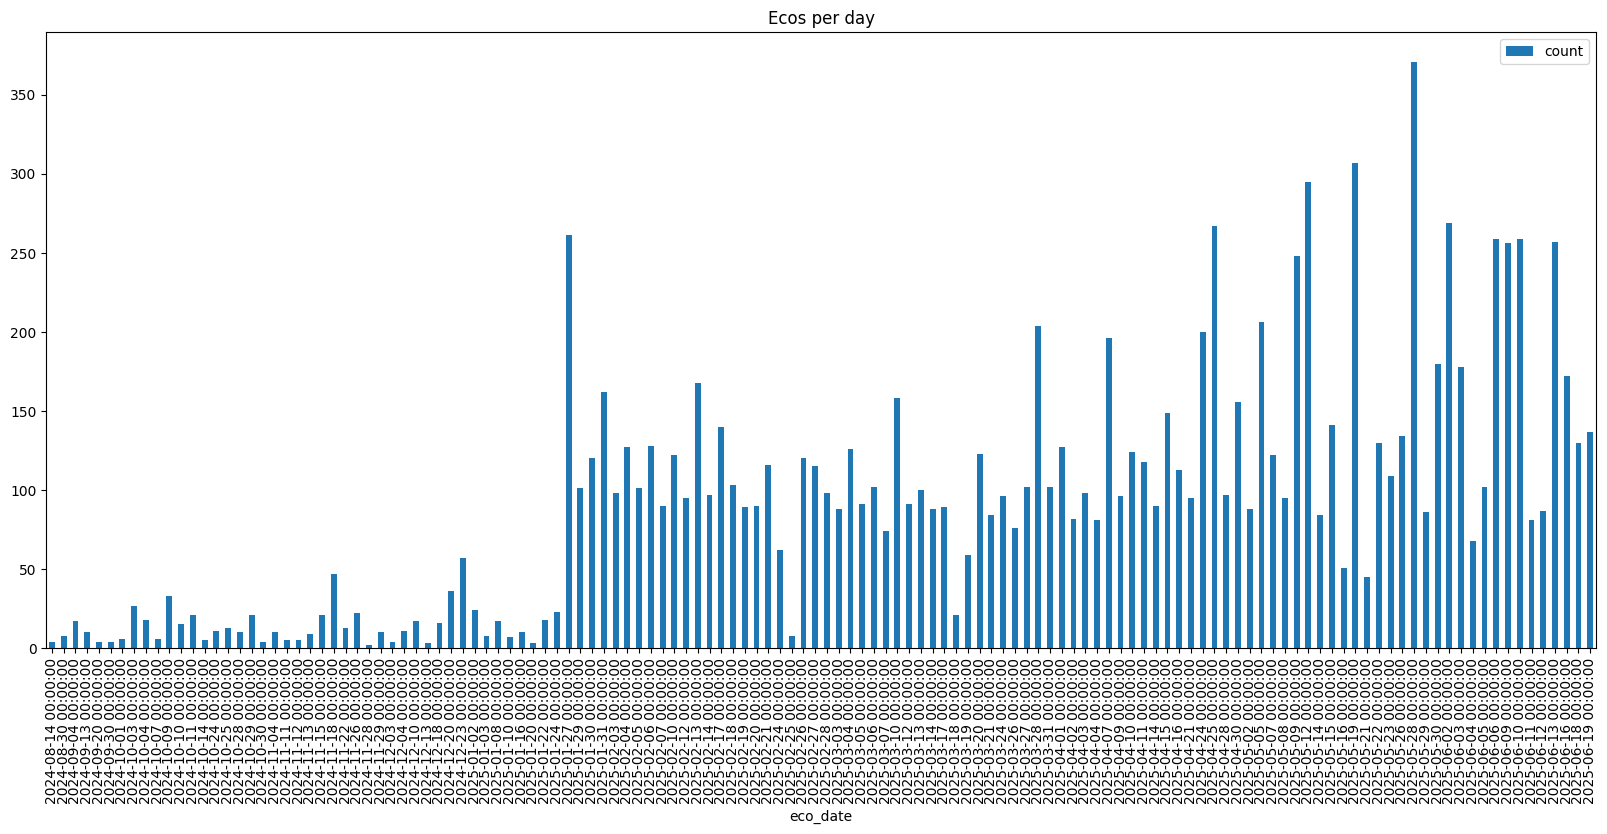

In [4]:

ecos_by_date = df.groupby('eco_date').size().to_frame("count").reset_index()
ecos_by_date.plot(kind='bar', x='eco_date', y='count', figsize=(20,8))
_=plt.title("Ecos per day")

The machine was more used from the day 27-01-25. From that day on the machine took in average the double of ecos than the days before.

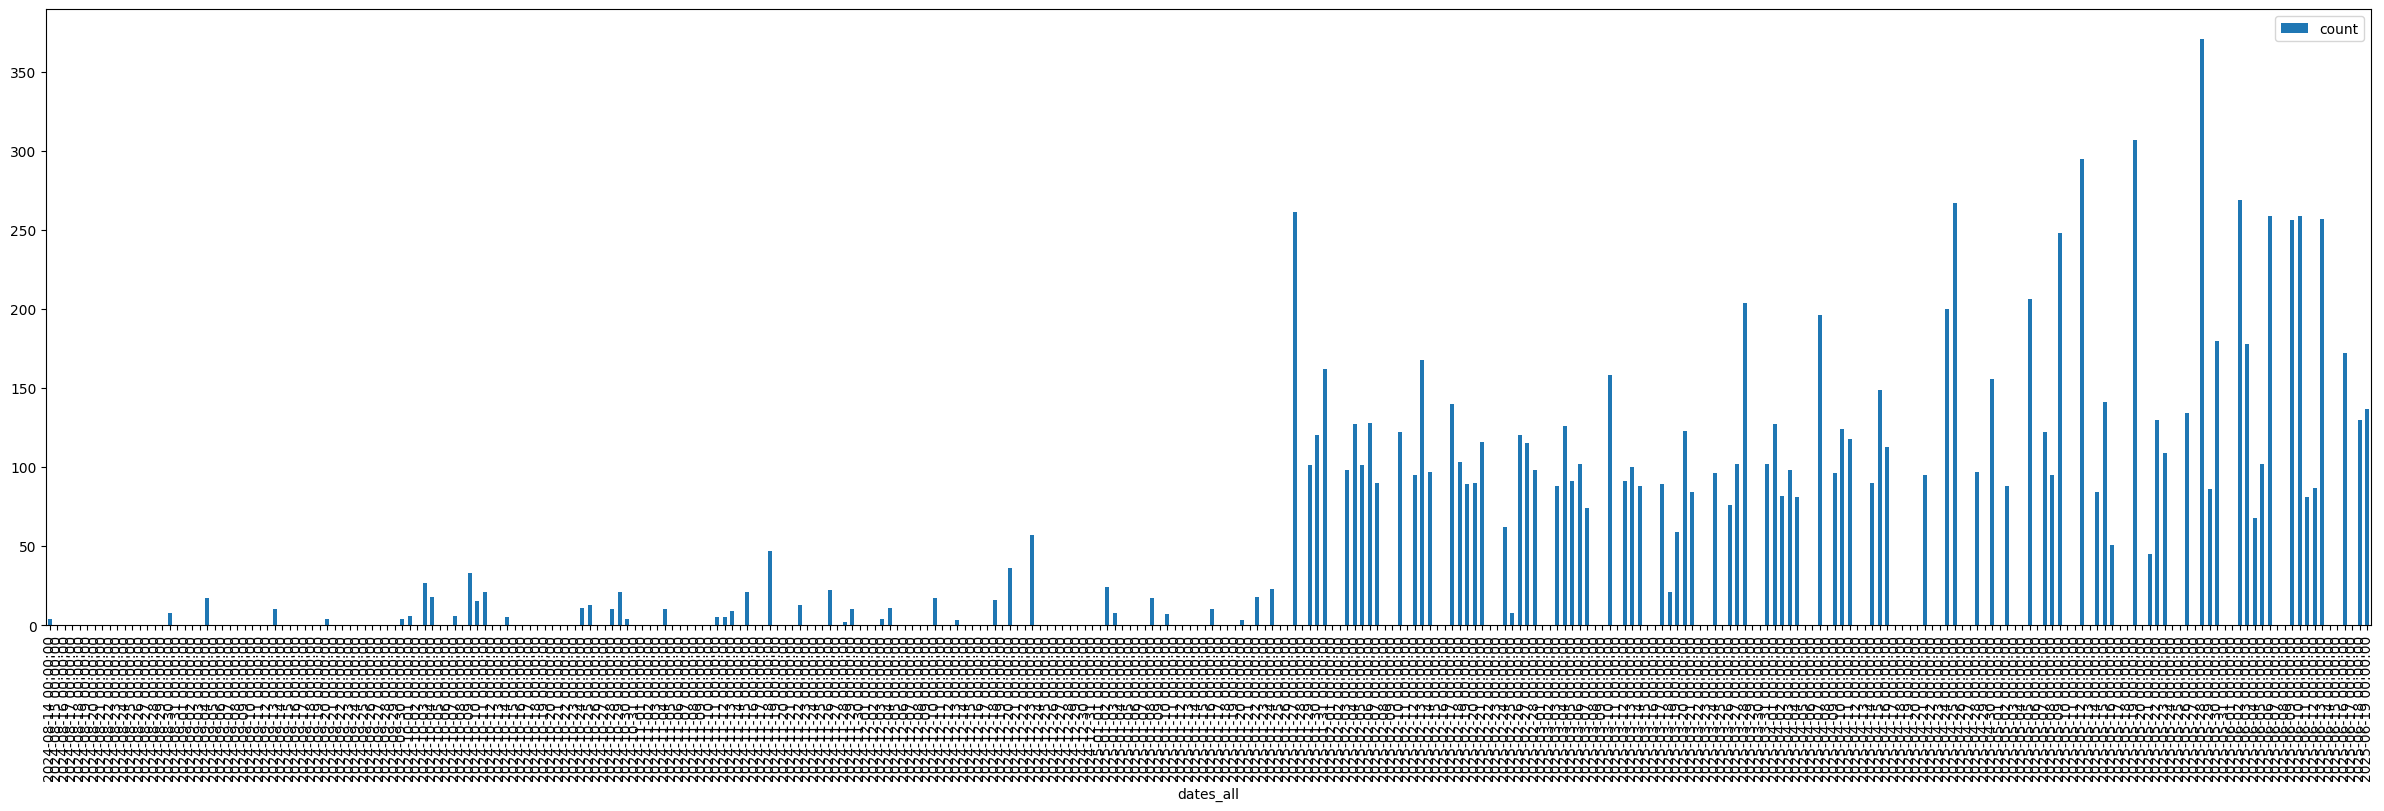

In [5]:
def generate_date_list(start_date, end_date):
    # Generate list of dates
    date_list = [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end_date - start_date).days + 1)]

    return date_list


dates = pd.DataFrame(data=generate_date_list(first_datetime, last_datetime),columns=["dates_all"])
dates['dates_all'] = pd.to_datetime(dates['dates_all'])
ecos_by_date['eco_date'] = pd.to_datetime(ecos_by_date['eco_date'])


both_dates=pd.merge(dates,ecos_by_date, how="left",left_on=["dates_all"],right_on=["eco_date"])

both_dates.plot(kind='bar', x='dates_all', y='count', figsize=(30,8))


plt.show()

Although ultrasounds are not performed on weekends or on Tuesdays every two weeks, there are still many gaps.

## Number of patients

In [6]:
patients_df = df[["eco_datetime","eco_date"]].drop_duplicates()
patients_df.dtypes

eco_datetime    datetime64[ns]
eco_date        datetime64[ns]
dtype: object

In [7]:
display(df.groupby('eco_datetime').size().describe())
print("Mode:",df.groupby('eco_datetime').size().mode().values)

count    7635.000000
mean        1.592141
std         2.218717
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        30.000000
dtype: float64

Mode: [1]


We have info from 811.000000 patients. Each patient has 6-7 ecos in average. Images or videos.

In [8]:
patients_df.head()

,eco_datetime,eco_date
0,2025-03-10 19:11:41.406,2025-03-10
4,2025-03-24 09:31:57.317,2025-03-24
10,2025-02-27 12:35:20.526,2025-02-27
23,2025-01-27 12:56:49.046,2025-01-27
37,2025-02-03 10:26:50.802,2025-02-03


In [9]:
display(patients_df.groupby('eco_date').size().describe())
print("Mode:",patients_df.groupby('eco_date').size().mode().values)

count    132.000000
mean      57.840909
std       82.778176
min        1.000000
25%        2.000000
50%       18.000000
75%       95.000000
max      369.000000
dtype: float64

Mode: [1]


There is information from 88 different days. On average, they see 6 patients per day, but as we know, there are different periods of activity.

Text(0.5, 1.0, 'Patients per day')

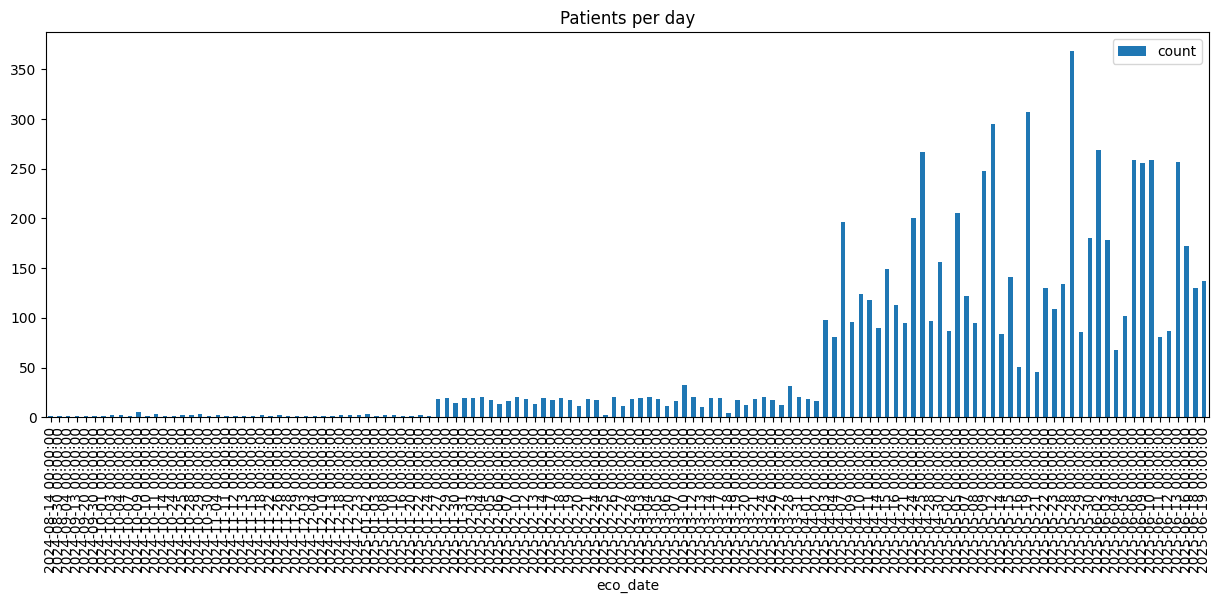

In [10]:
grouped_df = patients_df.groupby('eco_date').size().to_frame("count").reset_index()

grouped_df.plot(kind='bar', x='eco_date', y='count' ,figsize=(15,5))

plt.title("Patients per day")

In [11]:
grouped_df = df.groupby('eco_datetime').size().to_frame("count").reset_index()

Text(0.5, 1.0, 'Ecos per patient')

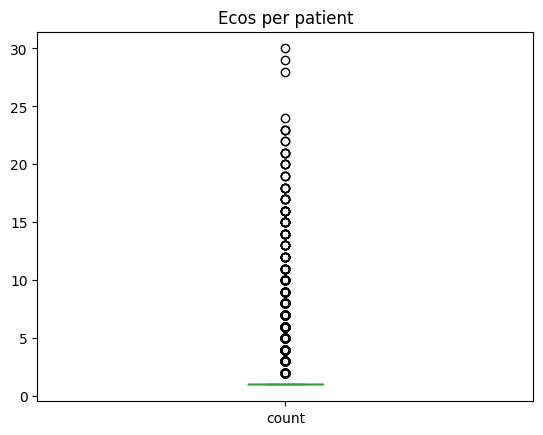

In [12]:
grouped_df.plot(kind='box', x='eco_datetime', y='count')
plt.title("Ecos per patient")

# EDA post manual classification

In [13]:

last_post_classification=get_newest_file(csv_path/"post_manual_classification/")
print(f"Last postclassification: {last_post_classification.name}")

df_classified=pd.read_csv(last_post_classification)
img_after=df_classified.shape[0]
df_classified.head()


Last postclassification: classified_structure_2025_07_01_11_11_49.csv


,category,filename,subdirectory,eco_datetime,image_datetime,image_id
0,Bazo,3_202504021522097310003.jpg,2.025032e+16,2025-03-17 12:58:36.880,2025-04-02 15:22:09.731,3.0
1,Bazo,8_202502261402126910008.jpg,2.025022e+16,2025-02-19 11:52:32.586,2025-02-26 14:02:12.691,8.0
2,Bazo,7_202504021524283560007.jpg,2.025031e+16,2025-03-07 10:01:44.272,2025-04-02 15:24:28.356,7.0
3,Bazo,2_202504021518177480002.jpg,2.025033e+16,2025-03-27 10:38:33.275,2025-04-02 15:18:17.748,2.0
4,Bazo,10_202506191650502470010.jpg,NaN,NaN,NaN,NaN


In [28]:
print(f"We have {img_after} ultrasound images after manual curation/classification. This is {(img_after/all_img_before)*100:.2f}% of the original size")

We have 5314 ultrasound images after manual curation/classification. This is 43.72% of the original size


In [15]:
df_liver=df_classified[df_classified.category.str.startswith("Higado")]

In [16]:
livers_num=df_liver.shape[0]
print(f"Of the {img_after} images {livers_num} are from the Liver.")

Of the 5314 images 3844 are from the Liver.


In [17]:
df_classified['category'].value_counts()

category
Higado_sano                          2600
Higado_con_esteatosis                 684
Higado_con_cirrosis                   540
Riñón                                 356
Bazo                                  330
Pancreas_normal                       314
Lesiones_hepaticas_benignas           279
Cálculos_y_pólipos_en_la_vesicula     191
Higado_con_hepatocarcinoma             20
Name: count, dtype: int64

In [18]:
df_classified['category'].value_counts(normalize=True).mul(100).round(2)

category
Higado_sano                          48.93
Higado_con_esteatosis                12.87
Higado_con_cirrosis                  10.16
Riñón                                 6.70
Bazo                                  6.21
Pancreas_normal                       5.91
Lesiones_hepaticas_benignas           5.25
Cálculos_y_pólipos_en_la_vesicula     3.59
Higado_con_hepatocarcinoma            0.38
Name: proportion, dtype: float64

In [19]:
healthy_liver_num=df_liver[df_liver.category==Categories.HEALTHY_LIVER].shape[0]
print(f"{healthy_liver_num} are from healthy livers, {healthy_liver_num/livers_num}%. The {livers_num-healthy_liver_num} rest are ill ones {(livers_num-healthy_liver_num)/livers_num}%.")
hcc_liver_num=df_liver[df_liver.category==Categories.HCC].shape[0]
print(f"We wanted HCCs. Of those we have {hcc_liver_num} wich is {hcc_liver_num/livers_num}%")

2600 are from healthy livers, 0.676378772112383%. The 1244 rest are ill ones 0.32362122788761705%.
We wanted HCCs. Of those we have 20 wich is 0.005202913631633715%


# Color Removed Eda

In [20]:
last_grayscale=get_newest_file(csv_path/"hurh/")
print(f"Last file is from: {last_grayscale.name}")
df_grayscale=pd.read_csv(last_grayscale)

df_grayscale=df_grayscale[df_grayscale.bmode]
colors_after=df_grayscale.shape[0]
df_grayscale.head()

Last file is from: hurh_2025_07_01_11_12_57.csv


,category,filename,subdirectory,eco_datetime,image_datetime,image_id,directory,bmode,img_path
0,Bazo,3_202504021522097310003.jpg,2.025032e+16,2025-03-17 12:58:36.880,2025-04-02 15:22:09.731,3.0,data/images/HURH/Bazo/bmode/,True,data/images/HURH/Bazo/bmode/3_2025040215220973...
1,Bazo,8_202502261402126910008.jpg,2.025022e+16,2025-02-19 11:52:32.586,2025-02-26 14:02:12.691,8.0,data/images/HURH/Bazo/bmode/,True,data/images/HURH/Bazo/bmode/8_2025022614021269...
3,Bazo,2_202504021518177480002.jpg,2.025033e+16,2025-03-27 10:38:33.275,2025-04-02 15:18:17.748,2.0,data/images/HURH/Bazo/bmode/,True,data/images/HURH/Bazo/bmode/2_2025040215181774...
4,Bazo,10_202506191650502470010.jpg,NaN,NaN,NaN,NaN,data/images/HURH/Bazo/bmode/,True,data/images/HURH/Bazo/bmode/10_202506191650502...
5,Bazo,5_202502261402573970005.jpg,2.025021e+16,2025-02-14 11:15:12.879,2025-02-26 14:02:57.397,5.0,data/images/HURH/Bazo/bmode/,True,data/images/HURH/Bazo/bmode/5_2025022614025739...


In [21]:
df_grayscale['category'].value_counts().T

category
Higado_sano                          1940
Higado_con_esteatosis                 550
Higado_con_cirrosis                   474
Riñón                                 354
Pancreas_normal                       277
Bazo                                  268
Lesiones_hepaticas_benignas           254
Cálculos_y_pólipos_en_la_vesicula     181
Higado_con_hepatocarcinoma             17
Name: count, dtype: int64

In [22]:
df_grayscale['category'].value_counts(normalize=True)*100

category
Higado_sano                          44.959444
Higado_con_esteatosis                12.746234
Higado_con_cirrosis                  10.984936
Riñón                                 8.203940
Pancreas_normal                       6.419467
Bazo                                  6.210892
Lesiones_hepaticas_benignas           5.886443
Cálculos_y_pólipos_en_la_vesicula     4.194670
Higado_con_hepatocarcinoma            0.393975
Name: proportion, dtype: float64

In [23]:
print(f"We have {colors_after} ultrasound images after manual curation/classification. This is {colors_after/all_img_before:.2f}% of the original size")

We have 4315 ultrasound images after manual curation/classification. This is 0.35% of the original size


In [24]:
df_liver_g=df_grayscale[df_grayscale.category.str.startswith("Higado")]

In [25]:
livers_num_g=df_liver_g.shape[0]
print(f"Of the {colors_after} Liver images {livers_num_g} are in grayscale .")

Of the 4315 Liver images 2981 are in grayscale .


In [26]:
df_liver_g['category'].value_counts()

category
Higado_sano                   1940
Higado_con_esteatosis          550
Higado_con_cirrosis            474
Higado_con_hepatocarcinoma      17
Name: count, dtype: int64

In [27]:
healthy_liver_num_g=df_liver_g[df_liver_g.category==Categories.HEALTHY_LIVER].shape[0]
print(f"{healthy_liver_num_g} are from healthy livers, {healthy_liver_num_g/livers_num_g}%. The {livers_num_g-healthy_liver_num_g} rest are ill ones {(livers_num_g-healthy_liver_num_g)/livers_num_g}%.")
hcc_liver_num_g=df_liver_g[df_liver_g.category==Categories.HCC]
print(f"We wanted HCCs. Of those we have {hcc_liver_num_g} which is {hcc_liver_num_g/livers_num}%")

1940 are from healthy livers, 0.6507883260650789%. The 1041 rest are ill ones 0.34921167393492114%.


TypeError: unsupported operand type(s) for /: 'str' and 'int'